### import important packages and libraries

In [1]:
# impport libraries and packages

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

### loading images and preprocess the data

In [2]:
def load_images(path, urls, target):
    images = []
    labels = []
    for url in urls:
        img_path = os.path.join(path, url)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (100, 100))
        img = img / 255.0
        images.append(img)
        labels.append(target)
    return np.array(images), np.array(labels)

### splitting the data after loading

In [3]:
PNEUMONIA_path = r"C:\Users\User\Downloads\New folder\chest_xray\train\PNEUMONIA"
Normal_path = r"C:\Users\User\Downloads\New folder\chest_xray\train\NORMAL"

PNEUMONIA_urls = os.listdir(PNEUMONIA_path)
Normal_urls = os.listdir(Normal_path)

PNEUMONIA_images, PNEUMONIA_labels = load_images(PNEUMONIA_path, PNEUMONIA_urls, 1)
Normal_images, Normal_labels = load_images(Normal_path, Normal_urls, 0)

data = np.concatenate([PNEUMONIA_images, Normal_images])
targets = np.concatenate([PNEUMONIA_labels, Normal_labels])


x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=42)

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


### model building

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(128, (4, 4), padding='same', strides=1, activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (4, 4), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(16, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)       

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))



Epoch 1/5


123/123 [==============================] - 106s 833ms/step - loss: 0.5166 - accuracy: 0.7917 - val_loss: 0.3385 - val_accuracy: 0.8988
Epoch 2/5
123/123 [==============================] - 99s 806ms/step - loss: 0.2399 - accuracy: 0.9103 - val_loss: 0.1321 - val_accuracy: 0.9425
Epoch 3/5
123/123 [==============================] - 99s 807ms/step - loss: 0.1521 - accuracy: 0.9435 - val_loss: 0.1062 - val_accuracy: 0.9601
Epoch 4/5
123/123 [==============================] - 100s 810ms/step - loss: 0.1326 - accuracy: 0.9504 - val_loss: 0.1872 - val_accuracy: 0.9463
Epoch 5/5
123/123 [==============================] - 106s 859ms/step - loss: 0.1424 - accuracy: 0.9473 - val_loss: 0.0976 - val_accuracy: 0.9586


## sample of the predicted data

41/41 [==============================] - 8s 191ms/step


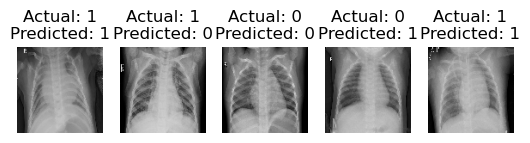

In [8]:
import matplotlib.pyplot as plt
# Make predictions on test data
predictions = model.predict(x_test)

# Visualize some sample predictions
num_samples = 5
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i])
    plt.title(f'Actual: {np.argmax(y_test[i])}\nPredicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()

### Evaluating the model

In [9]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

41/41 [==============================] - 8s 186ms/step - loss: 0.0976 - accuracy: 0.9586

Test Accuracy: 0.9586
41/41 [==============================] - 8s 192ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       357
           1       0.96      0.98      0.97       947

    accuracy                           0.96      1304
   macro avg       0.95      0.94      0.95      1304
weighted avg       0.96      0.96      0.96      1304


Confusion Matrix:
[[321  36]
 [ 18 929]]


### confusion Matrix

41/41 [==============================] - 8s 184ms/step


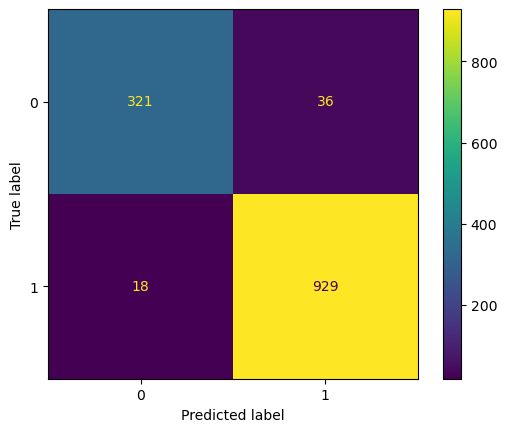

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_test_hat = np.argmax(model.predict(x_test), axis=1)
y_test = np.argmax(y_test, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat)

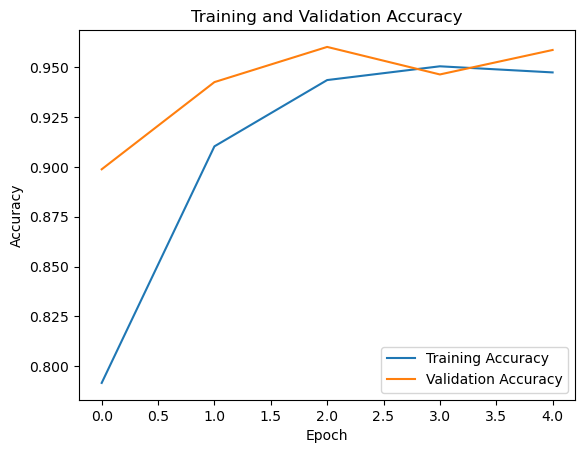

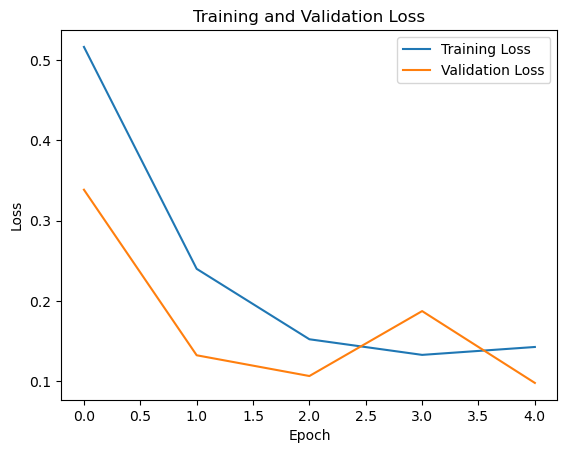

In [11]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model deployment

In [13]:
# Save the model
model.save("Chest_Xray.h5")

# Load the model
loaded_model = models.load_model("Chest_Xray.h5")



### Test on any new data 

In [14]:
# Assuming you have new_data as your input data for prediction
import os
import cv2
import numpy as np

def preprocess_new_data(directory_path):
    x = []

    for image_file in os.listdir(directory_path):
        # Construct the full path to the image file
        image_path = os.path.join(directory_path, image_file)

        # Read the image
        img = cv2.imread(image_path)

        # Check if the image is loaded successfully
        if img is None:
            print(f"Error: Unable to read image {image_path}")
            continue

        # Convert the image to RGB (OpenCV reads images in BGR format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize the image to (100, 100) - adjust size as needed
        img = cv2.resize(img, (100, 100))

        # Normalize the image
        img = img / 255.0

        x.append(img)

    return np.array(x)

# Directory containing your new data
new_data_directory = input("path_to_new_data_directory")

# Preprocess the new data
new_data = preprocess_new_data(new_data_directory)

# Assuming 'loaded_model' is your loaded Keras model
predictions = loaded_model.predict(new_data)

# 'predictions' will contain the predicted probabilities or class labels for the new data



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_new_data_directory'